In [25]:
%matplotlib inline
import numpy
from matplotlib import pyplot

In [2]:
# gravity acceleration; unit: m/s^2
g = 9.81

# drag coefficient; dimensionless
CD = (1.0/40.0)

# drag coefficient; dimensionless
CL = 1.0

# trim velocity; unit: m / s
vt = 30


In [4]:
# the square of the trim velocity; do not assign value directly;
vt2 = vt * vt

In [14]:
v0 = vt
theta0 = 0
x0 = 0
y0 = 1000

In [8]:
T = 100
dt = 0.1
N = int(T/dt) + 1

In [18]:
u = numpy.zeros((N,4))

In [19]:
u[0,0] = v0
u[0,1] = theta0
u[0,2] = x0
u[0,3] = y0

In [22]:
for n in range(0, N-1):
    v_n = -g * numpy.sin(u[n,1]) - (CD/CL)*(g/vt2)*((u[n,0])**2)
    theta_n = -(g/u[n,0])*numpy.cos(u[n,1]) + (g/vt2)*(u[n,0])
    x_n = (u[n,0])*numpy.cos(u[n,1])
    y_n = (u[n,0])*numpy.sin(u[n,1])
    f_n = numpy.array([v_n, theta_n, x_n, y_n])
    u[n+1] = u[n] + (dt * f_n)

Text(0,0.5,'y')

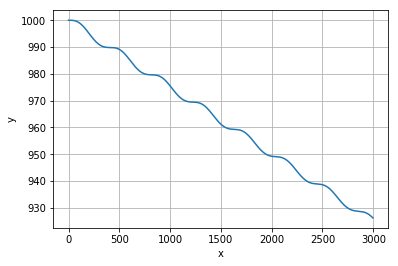

In [27]:
pyplot.plot(u[:,2], u[:,3]);
pyplot.grid()
pyplot.xlabel('x')
pyplot.ylabel('y')

# Part B

In [35]:
r = 2.0

# time steps
dt_coarsest = 0.1
dt_medium = dt_coarsest / r
dt_finest = dt_medium / r

# N for different time step sizes
N_coarsest = int(T/dt_coarsest) + 1
N_medium = int(T/dt_medium) + 1
N_finest = int(T/dt_finest) + 1

# initial u arrays holding variables to all time points
u_coarsest = numpy.zeros((N_coarsest,4))
u_medium = numpy.zeros((N_medium,4))
u_finest = numpy.zeros((N_finest,4))

# assign initial conditions to correct locations in u_coarsest, u_medium, and u_finest
u_coarsest[0,0] = v0
u_coarsest[0,1] = theta0
u_coarsest[0,2] = x0
u_coarsest[0,3] = y0

u_medium[0,0] = v0
u_medium[0,1] = theta0
u_medium[0,2] = x0
u_medium[0,3] = y0

u_finest[0,0] = v0
u_finest[0,1] = theta0
u_finest[0,2] = x0
u_finest[0,3] = y0

# iteration through Euler method for dt_coarsest
for n in range(0, N_coarsest-1):
    v_n_coarsest = -g * numpy.sin(u_coarsest[n,1]) - (CD/CL)*(g/vt2)*((u_coarsest[n,0])**2)
    theta_n_coarsest = -(g/u_coarsest[n,0])*numpy.cos(u_coarsest[n,1]) + (g/vt2)*(u_coarsest[n,0])
    x_n_coarsest = (u_coarsest[n,0])*numpy.cos(u_coarsest[n,1])
    y_n_coarsest = (u_coarsest[n,0])*numpy.sin(u_coarsest[n,1])
    f_n_coarsest = numpy.array([v_n_coarsest, theta_n_coarsest, x_n_coarsest, y_n_coarsest])
    u_coarsest[n+1] = u_coarsest[n] + (dt_coarsest * f_n_coarsest)
    
# iteration through Euler method for dt_medium
for n in range(0, N_medium-1):
    v_n_medium = -g * numpy.sin(u_medium[n,1]) - (CD/CL)*(g/vt2)*((u_medium[n,0])**2)
    theta_n_medium = -(g/u_medium[n,0])*numpy.cos(u_medium[n,1]) + (g/vt2)*(u_medium[n,0])
    x_n_medium = (u_medium[n,0])*numpy.cos(u_medium[n,1])
    y_n_medium = (u_medium[n,0])*numpy.sin(u_medium[n,1])
    f_n_medium = numpy.array([v_n_medium, theta_n_medium, x_n_medium, y_n_medium])
    u_medium[n+1] = u_medium[n] + (dt_medium * f_n_medium)

# iteration through Euler method for dt_finest
for n in range(0, N_finest-1):
    v_n_finest = -g * numpy.sin(u_finest[n,1]) - (CD/CL)*(g/vt2)*((u_finest[n,0])**2)
    theta_n_finest = -(g/u_finest[n,0])*numpy.cos(u_finest[n,1]) + (g/vt2)*(u_finest[n,0])
    x_n_finest = (u_finest[n,0])*numpy.cos(u_finest[n,1])
    y_n_finest = (u_finest[n,0])*numpy.sin(u_finest[n,1])
    f_n_finest = numpy.array([v_n_finest, theta_n_finest, x_n_finest, y_n_finest])
    u_finest[n+1] = u_finest[n] + (dt_finest * f_n_finest)

Text(0,0.5,'y')

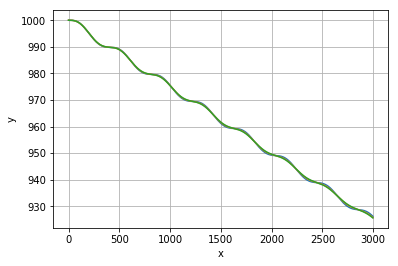

In [36]:
pyplot.plot(u_coarsest[:,2], u_coarsest[:,3])
pyplot.plot(u_medium[:,2], u_medium[:,3])
pyplot.plot(u_finest[:,2], u_finest[:,3])
pyplot.grid()
pyplot.xlabel('x')
pyplot.ylabel('y')

In [37]:
f32 = 0

In [38]:
for n in range(N_coarsest):
    f32 = f32 + numpy.abs(u_coarsest[n, 0] - u_medium[2*n, 0])
    f32 = f32 + numpy.abs(u_coarsest[n, 1] - u_medium[2*n, 1])
    f32 = f32 + numpy.abs(u_coarsest[n, 2] - u_medium[2*n, 2])
    f32 = f32 + numpy.abs(u_coarsest[n, 3] - u_medium[2*n, 3])

In [39]:
f21 = 0

In [40]:
for n in range(N_medium-1):
    f21 = f21 + numpy.abs(u_medium[n, 0] - u_finest[2*n, 0])
    f21 = f21 + numpy.abs(u_medium[n, 1] - u_finest[2*n, 1])
    f21 = f21 + numpy.abs(u_medium[n, 2] - u_finest[2*n, 2])
    f21 = f21 + numpy.abs(u_medium[n, 3] - u_finest[2*n, 3])

In [41]:
f32 = f32 * dt_medium

In [42]:
p = numpy.log10(f32/f21) / numpy.log10(r)

In [43]:
print(p)

-3.9467803928491767
